<a href="https://colab.research.google.com/github/aditigedam/MNIST-/blob/main/MNIST_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#to process matrix values 
import numpy as np
#to show images
import matplotlib.pyplot as plt
#keras to classify images
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#taking mnist dataset from keras
from keras.datasets import mnist
import cv2


In [108]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [109]:
image = x_train[0:1]

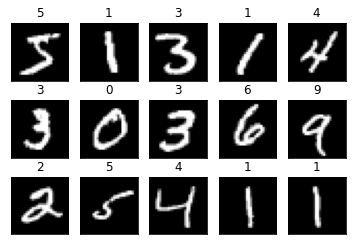

In [110]:
fig, axes = plt.subplots(3,5)
# , sharex=False, 
    # sharey=True)
j=0
for i in range(15):
  axes[(i%3),(j%5)].set_title(y_train[i])
  axes[(i%3),(j%5)].imshow(x_train[i], cmap='gray')
  axes[(i%3),(j%5)].get_xaxis().set_visible(False)
  axes[(i%3),(j%5)].get_yaxis().set_visible(False)
  j=j+1

In [111]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [112]:
#labels one_hot encoding
y_train_hot_encoded = []
for i in range(len(y_train)):
  y_train_hot_encoded.append(to_categorical(y_train[i], num_classes=10))

y_train_hot_encoded = np.array(y_train_hot_encoded)

y_test_hot_encoded = []
for i in range(len(y_test)):
  y_test_hot_encoded.append(to_categorical(y_test[i], num_classes=10))

y_test_hot_encoded = np.array(y_test_hot_encoded)

In [113]:
y_test_hot_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [114]:
y_train_hot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [115]:
print(y_train_hot_encoded.shape)
print(y_test_hot_encoded.shape)

(60000, 10)
(10000, 10)


In [116]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [117]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 3925      
                                                                 
 dense_9 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


The code above shows that we pass categorical cross entropy for the loss function argument because it is just the best one to be used in multiclass classification problem. Next, we use Adam optimizer since it is also the best one for most cases. Lastly we have accuracy to be passed in metrics argument in order to measure the performance of our classifier.

In [118]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [ ]:
# training the data
model.fit(x_train, y_train_hot_encoded, epochs=50,validation_data=(x_test,y_test_hot_encoded))

In [145]:
prediction = model.predict(x_test)

In [146]:
predictions = np.argmax(prediction, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


In [154]:
print(model.evaluate(x_train, y_train_hot_encoded))
print(model.evaluate(x_test, y_test_hot_encoded))


1875/1875 [==============================] - 3s 2ms/step - loss: 0.5819 - acc: 0.8484
[0.5819197297096252, 0.8483833074569702]
313/313 [==============================] - 0s 1ms/step - loss: 0.5836 - acc: 0.8510
[0.5835844874382019, 0.8510000109672546]


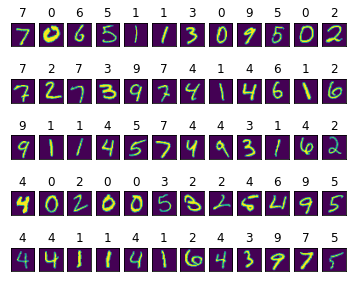

In [174]:
from IPython.core.pylabtools import figsize
fig,axes = plt.subplots(5,12,figsize=(6,5))# figsize(width,height)
j=0
# fig.tight_layout() #for maintaing space between the subplot's titles, It prevant the plots from overlaping 
for i in range(60):
  axes[i%5,j%12].imshow(x_test[i])
  axes[i%5,j%12].set_title(predictions[i])
  axes[i%5,j%12].get_xaxis().set_visible(False)
  axes[i%5,j%12].get_yaxis().set_visible(False)
  j=j+1